# Logistic Regression

In [1]:
class LogitRegression() :
    def __init__( self, learning_rate, iterations ) :        
        self.learning_rate = learning_rate        
        self.iterations = iterations  
    def fit( self, X, Y ) :            
        self.m, self.n = X.shape              
        self.W = np.zeros( self.n )        
        self.b = 0        
        self.X = X        
        self.Y = Y              
        for i in range( self.iterations ) :            
            self.update_weights()            
        return self
      
    def update_weights( self ) :           
        A = 1 / ( 1 + np.exp( - ( self.X.dot( self.W ) + self.b ) ) )
        
        tmp = ( A - self.Y.T )        
        tmp = np.reshape( tmp, self.m )        
        dW = np.dot( self.X.T, tmp ) / self.m         
        db = np.sum( tmp ) / self.m 
           
        self.W = self.W - self.learning_rate * dW    
        self.b = self.b - self.learning_rate * db
        
        return self
    def predict( self, X ) :    
        Z = 1 / ( 1 + np.exp( - ( X.dot( self.W ) + self.b ) ) )        
        Y = np.where( Z > 0.5, 1, 0 )      
        w = self.W
        b = self.b
        return Y, w,b

In [22]:
def true_positive(actual, prediction):
    tp = 0
    for act, pred in zip(actual, prediction):
        if act == 1 and pred == 1:
            tp +=1
    return tp

def true_negative(actual, prediction):
    tn = 0
    for act, pred in zip(actual, prediction):
        if act == 0 and pred == 0:
            tn +=1
    return tn

def false_positive(actual, prediction):
    fp = 0
    for act, pred in zip(actual, prediction):
        if act == 0 and pred == 1:
            fp +=1
    return fp

def false_negative(actual, prediction):
    fn = 0
    for act, pred in zip(actual, prediction):
        if act == 1 and pred == 0:
            fn +=1
    return fn

def accuracy(actual, prediction):
    tp = true_positive(actual, prediction)  
    fp = false_positive(actual, prediction)  
    fn = false_negative(actual, prediction)  
    tn = true_negative(actual, prediction)  
    acc_score = (tp + tn)/ (tp + tn + fp + fn)  
    return acc_score

def precision(actual, prediction):
    tp = true_positive(actual, prediction)  
    fp = false_positive(actual, prediction)  
    prec = tp/ (tp + fp)  
    return prec

def recall(actual, prediction):
    tp = true_positive(actual, prediction)  
    fn = false_negative(actual, prediction)  
    rec = tp/ (tp + fn)  
    return rec

def f1(actual, prediction):
    p = precision(actual, prediction)
    r = recall(actual, prediction)
    f1_score = 2 * p * r/ (p + r) 
    return f1_score

In [23]:
def plot_decision_boundary(X, w, b):

    x1 = [min(X_act[:,0]), max(X_act[:,0])]
    m = -w[0]/w[1]
    c = -b/w[1]
    x2 = np.dot(m,x1) + c
 
    fig = plt.figure(figsize=(10,8))
    plt.plot(X_act[:, 0][Y_act==0], X_act[:, 1][Y_act==0], "g^")
    plt.plot(X_act[:, 0][Y_act==1], X_act[:, 1][Y_act==1], "bs")
    plt.xlim([-2.5,10])
    plt.ylim([-2.5, 10])
    plt.xlabel("feature 1")
    plt.ylabel("feature 2")
    plt.title('Decision Boundary')
    plt.plot(x1, x2, 'y-')

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('Logistic_regression_ls.csv')

In [6]:
df.head()

,x1,x2,label
0,7.395,7.638,1
1,4.987,6.485,1
2,5.358,6.499,1
3,2.036,2.380,0
4,5.956,7.378,1


In [7]:
X = df[['x1','x2']]
Y = df['label']

In [8]:
X.shape

(500, 2)

In [12]:
X_act = X.to_numpy()
X_train = X_act[:400]
X_test = X_act[400:]
Y_act = Y.to_numpy()
Y_train = Y_act[:400]
Y_test = Y_act[400:]

In [13]:
model = LogitRegression( learning_rate = 0.01, iterations = 10000 )
model.fit( X_train, Y_train)    
Y_pred, w,b = model.predict( X_test )    

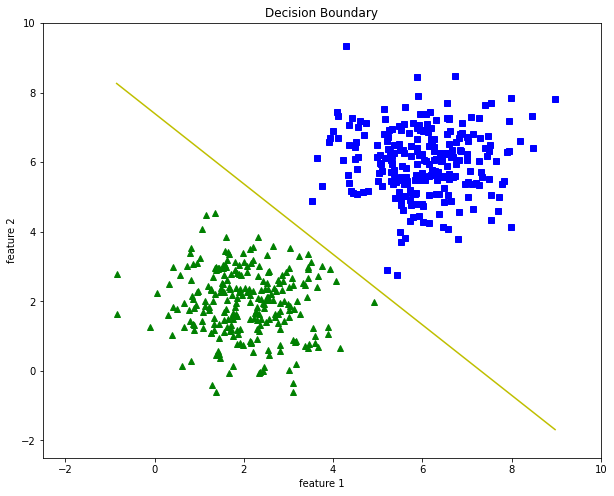

In [36]:
plot_decision_boundary(X, w, b)

In [27]:
print(f"True Positive = {true_positive(Y_test,Y_pred)}")
print(f"True Negative = {true_negative(Y_test,Y_pred)}")
print(f"False Positive = {false_positive(Y_test,Y_pred)}")
print(f"False Negative = {false_negative(Y_test,Y_pred)}")
print(f"accuracy score = {accuracy(Y_test,Y_pred)}")
print(f"precision  = {precision(Y_test,Y_pred)}")
print(f"recall  = {recall(Y_test,Y_pred)}")
print(f"f1_score  = {f1(Y_test,Y_pred)}")

True Positive = 50
True Negative = 50
False Positive = 0
False Negative = 0
accuracy score = 1.0
precision  = 1.0
recall  = 1.0
f1_score  = 1.0


# Comparing Results with Scikit-Learn

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [29]:
log_model = LogisticRegression()

In [30]:
log_model.fit(X_train,Y_train)

LogisticRegression()

In [32]:
Y_pred = log_model.predict(X_test)

In [33]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [35]:
print(confusion_matrix(Y_test,Y_pred))

[[50  0]
 [ 0 50]]
